Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [9]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [10]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [11]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [12]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [13]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [14]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic_keratosis', 'basal_cell_carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented_benign_keratosis', 'seborrheic_keratosis', 'squamous_cell_carcinoma', 'vascular_lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

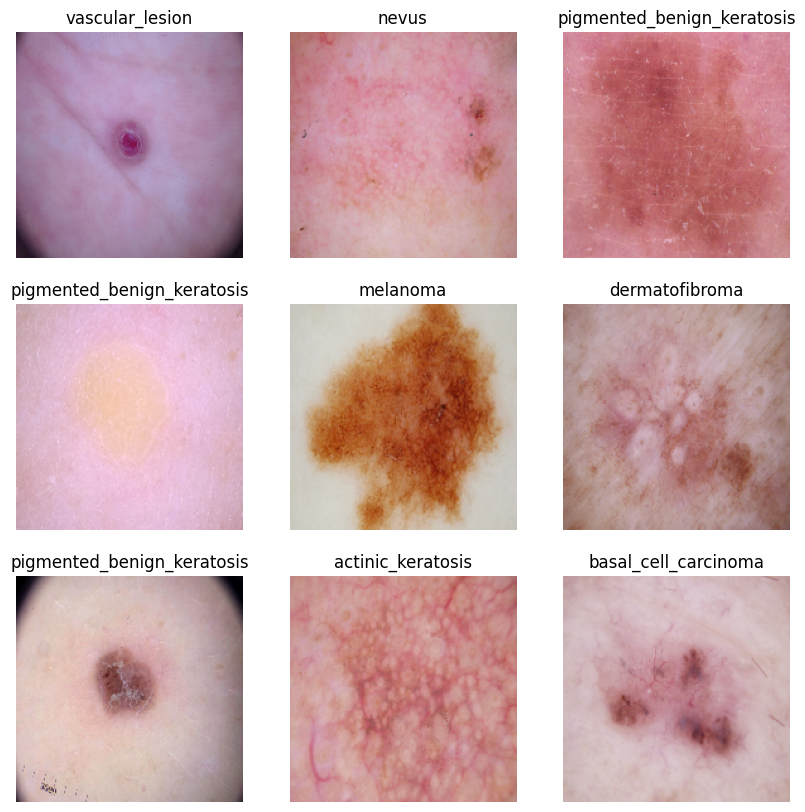

In [15]:
import matplotlib.pyplot as plt
# Get class names from the dataset
class_names = train_ds.class_names

# Plotting setup
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

# Define the model
model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(9, activation='softmax')  # 9 classes for the output layer
])

Let's start with a simple model.

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 126736)            0         
                                                                 
 dense (Dense)               (None, 9)                 1140633   
                                                                 
Total params: 1141081 (4.35 MB)
Trainable params: 1141081 (4.35 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

### Train the model

In [21]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 601s 2s/step - loss: 4.3331 - accuracy: 0.2472 - val_loss: 1.7921 - val_accuracy: 0.3781
Epoch 2/20
56/56 [==============================] - 1s 17ms/step - loss: 1.5225 - accuracy: 0.4565 - val_loss: 1.4827 - val_accuracy: 0.4765
Epoch 3/20
56/56 [==============================] - 1s 12ms/step - loss: 1.2372 - accuracy: 0.5709 - val_loss: 1.4472 - val_accuracy: 0.5257
Epoch 4/20
56/56 [==============================] - 1s 13ms/step - loss: 1.0977 - accuracy: 0.6323 - val_loss: 1.5118 - val_accuracy: 0.5213
Epoch 5/20
56/56 [==============================] - 1s 13ms/step - loss: 0.9680 - accuracy: 0.6741 - val_loss: 1.5441 - val_accuracy: 0.5481
Epoch 6/20
56/56 [==============================] - 1s 12ms/step - loss: 0.8435 - accuracy: 0.7215 - val_loss: 1.5341 - val_accuracy: 0.5459
Epoch 7/20
56/56 [==============================] - 1s 12ms/step - loss: 0.7539 - accuracy: 0.7550 - val_loss: 1.5115 - val_accuracy: 0.5414
Epoch 8/20
56

### Visualizing training results

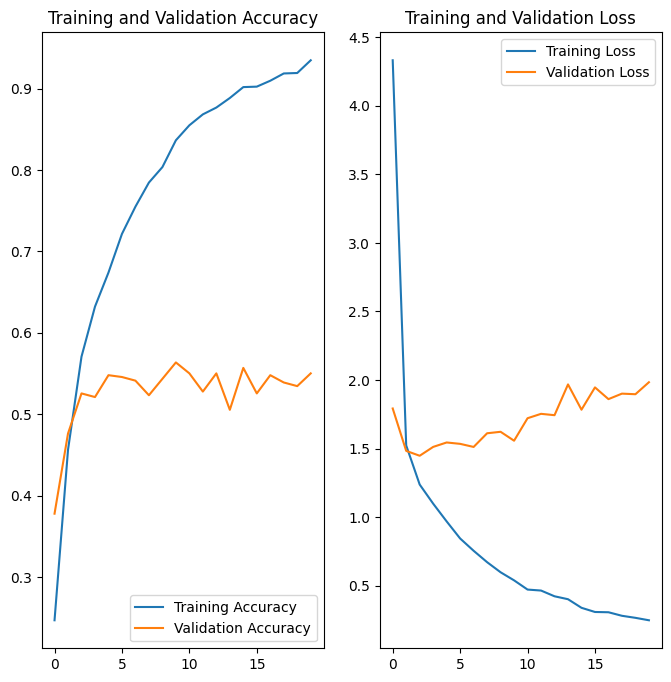

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

As we can see, the base model we built performs well on the training dataset but poorly on the testing data, indicating overfitting. This is evident in the graph above. To address this issue, let's incorporate some augmentation techniques and strive to improve accuracy.



### Todo:
### Create the model, compile and train the model


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=data_dir_train,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical' 
)

val_generator = val_datagen.flow_from_directory(
    directory=data_dir_test,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)


model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(9, activation='softmax') 
])


Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


### Compiling the model

In [25]:
# Compile the model
model.compile(optimizer='adam',  # Using Adam for better generalization
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Training the model

In [26]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_generator,
  validation_data=val_generator,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 136s 2s/step - loss: 2.0276 - accuracy: 0.1983 - val_loss: 2.2463 - val_accuracy: 0.1356
Epoch 2/20
70/70 [==============================] - 51s 735ms/step - loss: 2.0119 - accuracy: 0.2197 - val_loss: 2.2679 - val_accuracy: 0.1695
Epoch 3/20
70/70 [==============================] - 55s 771ms/step - loss: 1.9725 - accuracy: 0.2479 - val_loss: 2.1465 - val_accuracy: 0.2119
Epoch 4/20
70/70 [==============================] - 52s 736ms/step - loss: 1.9580 - accuracy: 0.2644 - val_loss: 2.2344 - val_accuracy: 0.2119
Epoch 5/20
70/70 [==============================] - 52s 744ms/step - loss: 1.9290 - accuracy: 0.2765 - val_loss: 2.1413 - val_accuracy: 0.2542
Epoch 6/20
70/70 [==============================] - 52s 749ms/step - loss: 1.9272 - accuracy: 0.2912 - val_loss: 2.1206 - val_accuracy: 0.2458
Epoch 7/20
70/70 [==============================] - 52s 751ms/step - loss: 1.9110 - accuracy: 0.2952 - val_loss: 2.0692 - val_accuracy: 0.3051
E

### Visualizing the results

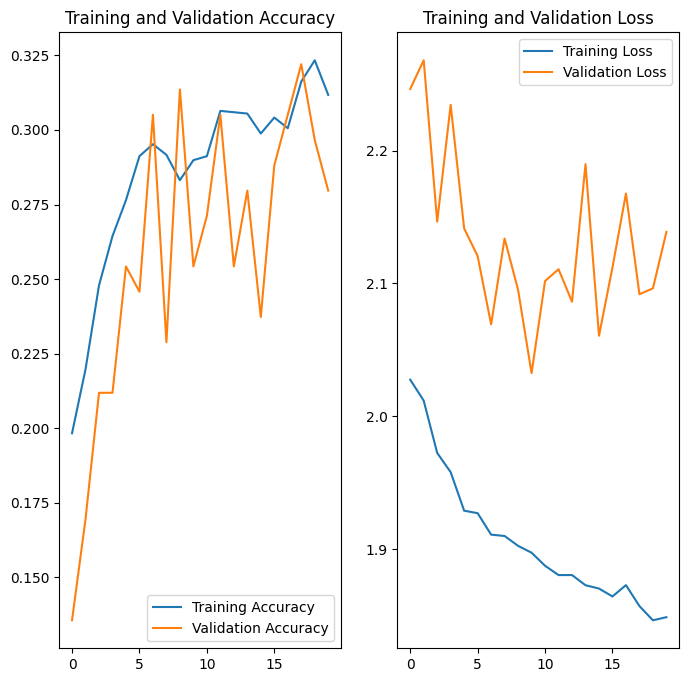

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

As shown in the graph, the model has not improved as significantly as expected. The accuracy of the model has also decreased. While there are slight improvements after increasing model complexity and adding augmentation, they are not substantial.

Let's examine the class distribution and explore further enhancements.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [28]:
## Your code goes here.
import numpy as np

# Check the class distribution in the training set
class_counts = np.bincount(train_generator.classes)
print("Class distribution in training set:", class_counts)

# Check the class distribution in the validation set
class_counts_val = np.bincount(val_generator.classes)
print("Class distribution in validation set:", class_counts_val)


Class distribution in training set: [114 376  95 438 357 462  77 181 139]
Class distribution in validation set: [16 16 16 16 16 16  3 16  3]


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
Class 7 has the least number of samples with only 77 samples.
#### - Which classes dominate the data in terms proportionate number of samples?
Classes 5 and 6 dominate the data with 357 and 462 samples respectively.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [30]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
path_to_training_dataset="/content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic_keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7BA3AFFE7F40>: 100%|██████████| 500/500 [00:18<00:00, 26.73 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal_cell_carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7BA33E5CE2F0>: 100%|██████████| 500/500 [00:19<00:00, 26.06 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7BA44A36EB60>: 100%|██████████| 500/500 [00:19<00:00, 25.58 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7BA33E438DC0>: 100%|██████████| 500/500 [01:43<00:00,  4.82 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7BA33E4DF610>: 100%|██████████| 500/500 [01:28<00:00,  5.63 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented_benign_keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BA3AFF657B0>: 100%|██████████| 500/500 [00:19<00:00, 25.98 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic_keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7BA3AFF9EEF0>: 100%|██████████| 500/500 [00:45<00:00, 10.90 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous_cell_carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BA3AFF3A5F0>: 100%|██████████| 500/500 [00:20<00:00, 24.82 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular_lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7BA33DFA8550>: 100%|██████████| 500/500 [00:20<00:00, 24.78 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [34]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [36]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000533.jpg_91eb6175-1b9e-4420-a799-a75cb7869d20.jpg',
 '/content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010767.jpg_106d3c2c-354f-4b5d-af61-84f3e7de09e8.jpg',
 '/content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0009992.jpg_24a362b9-128d-4f52-b5df-6381187185e4.jpg',
 '/content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010876.jpg_85d2b85b-889a-413d-ae22-06253e472681.jpg',
 '/content/drive/MyDrive/Melonoma Assinment /CNN_assignment/Skin cancer ISIC The International Skin Imaging Coll

In [37]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [39]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [53]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [54]:
new_df['Label'].value_counts()

Label
melanoma                      500
dermatofibroma                500
nevus                         500
vascular_lesion               500
squamous_cell_carcinoma       500
seborrheic_keratosis          500
pigmented_benign_keratosis    500
basal_cell_carcinoma          500
actinic_keratosis             500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [41]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [43]:
# train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [44]:
# validation dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)


Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [45]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [46]:
#Final Model with mulitple layers
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 41, 41, 128)      

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [49]:
## your code goes here
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### **Todo:**  Train your model

In [51]:
epochs = 30
# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/30
169/169 [==============================] - 55s 117ms/step - loss: 1.8598 - accuracy: 0.3027 - val_loss: 1.5099 - val_accuracy: 0.4291
Epoch 2/30
169/169 [==============================] - 9s 55ms/step - loss: 1.4976 - accuracy: 0.4247 - val_loss: 1.3201 - val_accuracy: 0.5174
Epoch 3/30
169/169 [==============================] - 9s 54ms/step - loss: 1.3597 - accuracy: 0.4846 - val_loss: 1.2547 - val_accuracy: 0.5308
Epoch 4/30
169/169 [==============================] - 9s 53ms/step - loss: 1.2322 - accuracy: 0.5265 - val_loss: 1.1096 - val_accuracy: 0.6080
Epoch 5/30
169/169 [==============================] - 9s 52ms/step - loss: 1.1363 - accuracy: 0.5653 - val_loss: 1.0254 - val_accuracy: 0.6080
Epoch 6/30
169/169 [==============================] - 9s 53ms/step - loss: 1.0335 - accuracy: 0.6092 - val_loss: 0.9976 - val_accuracy: 0.6437
Epoch 7/30
169/169 [==============================] - 9s 55ms/step - loss: 0.9388 - accuracy: 0.6463 - val_loss: 0.8701 - val_accuracy: 0.68

#### **Todo:**  Visualize the model results

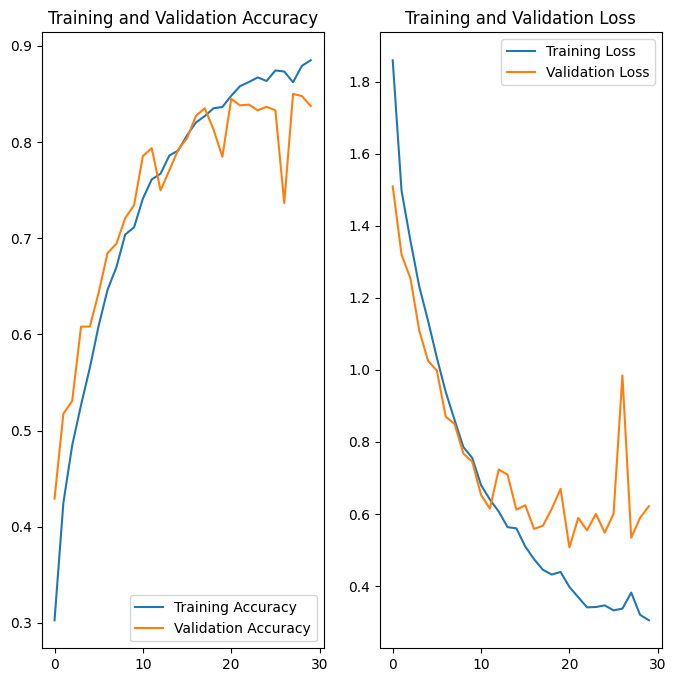

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### Yes, we have gotten rid of overfitting. The class rebalancing has also helped a lot.<br>After adding 500 images to each class and applying data augmentation, along with increasing the model complexity, we have significantly improved the model's performance and accuracy.<br>As shown in the graph, both the training and validation accuracy have improved noticeably.<br>The training accuracy is now 88%, and the validation accuracy is 85%.
